<a href="https://colab.research.google.com/github/KavishaMadani/machine-learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from scipy.optimize import minimize

In [ ]:
stats_female=pd.read_csv('stats_females.csv')
stats_female.head()

,Height,momheight,dadheight
0,66.0,66.0,71.0
1,64.0,62.0,68.0
2,64.0,65.0,70.0
3,69.0,66.0,76.0
4,66.0,63.0,70.0


In [ ]:
salary_data=pd.read_csv('salary_data.csv')
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
stats_female['intercept'] = 1

In [ ]:
X = stats_female[['intercept', 'momheight', 'dadheight']].values
y = stats_female['Height'].values

In [ ]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Weight vector (w):")
print(w)

Weight vector (w):
[18.54725207  0.30350558  0.38785559]


In [ ]:
salary_data['intercept'] = 1
X = salary_data[['intercept','YearsExperience']].values
y = salary_data['Salary'].values
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Weight vector (w):")
print(w)

Weight vector (w):
[25792.20019867  9449.96232146]


In [ ]:
model = LinearRegression()
model.fit(X, y)
print("weights:", model.coef_)

weights: [   0.         9449.96232146]


Scikit Learn model to apply linear regression uses gradient descent approach and uses regulization. Hence using the method we are able to find the answer of the weights w.

## Question 2

In [ ]:
def mse(m, b, x, y):
    predicted = m * x + b
    errors = y - predicted
    return np.mean(errors**2)

In [ ]:
def gradient_descent(x, y, learning_rate, iterations):
    m = 0
    b = 0
    cost_l = []
    for i in range(iterations):
        predicted = m * x + b
        errors = y - predicted
        cost = mse(m, b, x, y)
        cost_l.append(cost)
        m_grad = (-2/len(x)) * np.sum(x * errors)
        b_grad = (-2/len(x)) * np.sum(errors)
        m -= learning_rate * m_grad
        b -= learning_rate * b_grad
    return m, b, cost

In [ ]:
x = salary_data['YearsExperience'].values
y = salary_data['Salary'].values
m, b, cost_history = gradient_descent(x, y, 0.01, 1000)
predicted_y = m * x + b
print(m)
print(b)

9501.013219578916
25448.181745946968


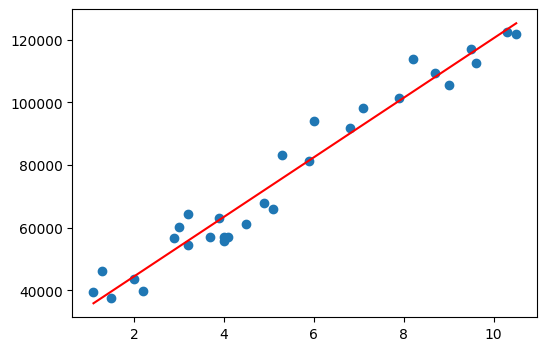

In [ ]:
plt.figure(figsize = (6,4))
plt.scatter(x, y)
plt.plot(x, predicted_y, color='red')
plt.show()

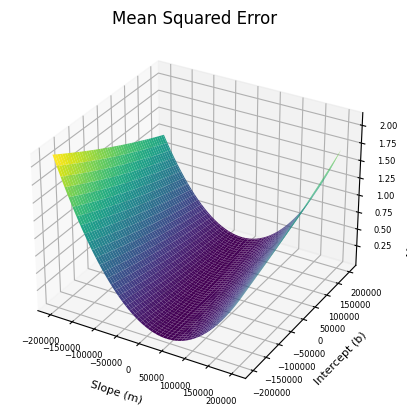

In [ ]:
m_range = np.linspace(-200000, 200000, 100)
b_range = np.linspace(-200000, 200000, 100)
M, B = np.meshgrid(m_range, b_range)
Z = np.array([[mse(m, b, x, y) for m in m_range] for b in b_range])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(M, B, Z, cmap='viridis')
ax.set_xlabel('Slope (m)',fontsize=8)
ax.set_ylabel('Intercept (b)',fontsize=8)
ax.set_zlabel('Mean Squared Error (MSE)',fontsize=8)
ax.set_title('Mean Squared Error')
ax.tick_params(axis='x', labelsize=6)
ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='z', labelsize=6)
plt.show()

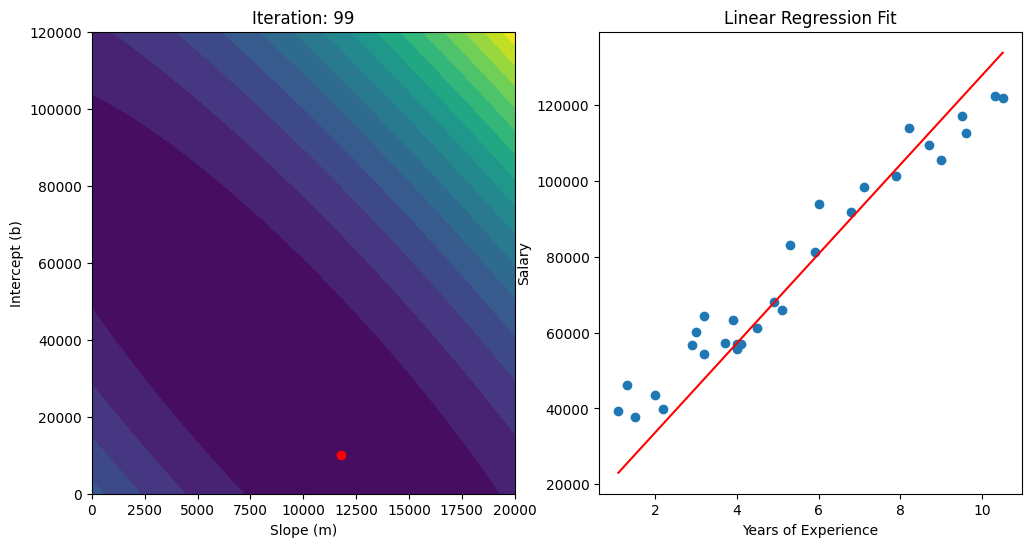

In [ ]:
def batch_gradient_descent(x, y, learning_rate, iterations):
    m = 0
    b = 0
    cost_history = []
    for i in range(iterations):
        prediction = m * x + b
        errors = y - prediction
        cost = mse(m, b, x, y)
        cost_history.append(cost)
        m_gradient = (-2/len(x)) * np.sum(x * errors)
        b_gradient = (-2/len(x)) * np.sum(errors)
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient
    return m, b, cost_history

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
m_range = np.linspace(0, 20000, 100)
b_range = np.linspace(0, 120000, 100)
M, B = np.meshgrid(m_range, b_range)
Z = np.array([[mse(m, b, x, y) for m in m_range] for b in b_range])
scatter = ax2.scatter(x, y)
line, = ax2.plot([], [], color='red')
def update(frame):
    ax1.clear()
    ax2.clear()
    m, b, cost_history = batch_gradient_descent(x, y, 0.01, frame)
    ax1.set_title(f'Iteration: {frame}')
    ax1.set_xlabel('Slope (m)')
    ax1.set_ylabel('Intercept (b)')
    ax1.contourf(M, B, Z, levels=20, cmap='viridis')
    ax1.plot(m, b, 'ro')
    ax2.scatter(x, y)
    line.set_data(x, m * x + b)
    ax2.plot(x, m * x + b, color='red')
    ax2.set_title('Linear Regression Fit')
    ax2.set_xlabel('Years of Experience')
    ax2.set_ylabel('Salary')
    return line,
ani = FuncAnimation(fig, update, frames=range(100), blit=True)
ani.save('gradient_descent.gif', writer='pillow')
plt.show()

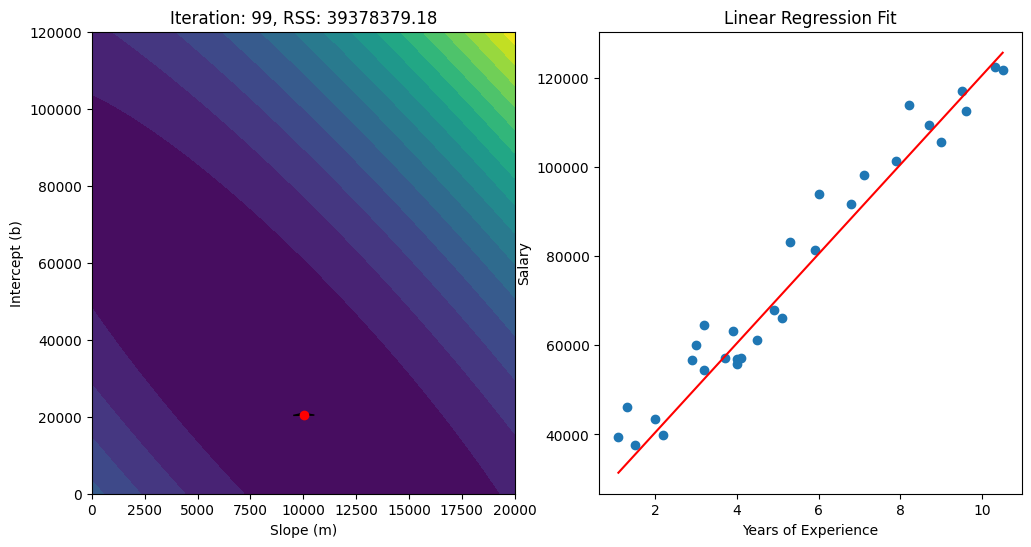

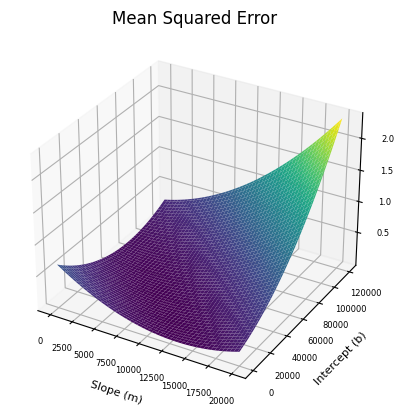

In [ ]:
def mse(m, b, x, y):
    predicted = m * x + b
    errors = y - predicted
    return np.mean(errors**2)
def mini_batch_gradient_descent(x, y, learning_rate, num_iterations, batch_size):
    m = 0
    b = 0
    cost_history = []
    num_batches = len(x) // batch_size
    for i in range(num_iterations):
        for batch in range(num_batches):
            batch_start = batch * batch_size
            batch_end = (batch + 1) * batch_size
            x_batch = x[batch_start:batch_end]
            y_batch = y[batch_start:batch_end]
            predicted = m * x_batch + b
            errors = y_batch - predicted
            cost = mse(m, b, x_batch, y_batch)
            cost_history.append(cost)
            m_gradient = (-2/len(x_batch)) * np.sum(x_batch * errors)
            b_gradient = (-2/len(x_batch)) * np.sum(errors)
            m -= learning_rate * m_gradient
            b -= learning_rate * b_gradient
    return m, b, cost_history
x = salary_data['YearsExperience'].values
y = salary_data['Salary'].values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
m_range = np.linspace(0, 20000, 100)
b_range = np.linspace(0, 120000, 100)
M, B = np.meshgrid(m_range, b_range)
Z = np.array([[mse(m, b, x, y) for m in m_range] for b in b_range])
scatter = ax2.scatter(x, y)
line, = ax2.plot([], [], color='red')
def update(frame):
    ax1.clear()
    ax2.clear()
    m, b, _ = mini_batch_gradient_descent(x, y, 0.01, frame, batch_size=10)
    ax1.set_title(f'Iteration: {frame}, RSS: {mse(m, b, x, y):.2f}')
    ax1.set_xlabel('Slope (m)')
    ax1.set_ylabel('Intercept (b)')
    ax1.contourf(M, B, Z, levels=20, cmap='viridis')
    ax1.plot(m, b, 'ro')
    ax2.scatter(x, y)
    ax2.plot(x, m * x + b, color='red')
    ax2.set_title('Linear Regression Fit')
    ax2.set_xlabel('Years of Experience')
    ax2.set_ylabel('Salary')
    if frame > 0:
        m_prev, b_prev, _ = mini_batch_gradient_descent(x, y, 0.01, frame - 1, batch_size=10)  # Adjust batch_size as needed
        ax1.arrow(m_prev, b_prev, m - m_prev, b - b_prev, head_width=1000, head_length=500, fc='k', ec='k')
    return line,
ani = FuncAnimation(fig, update, frames=range(100), blit=True)
ani.save('mini_batch.gif', writer='pillow')
plt.show()


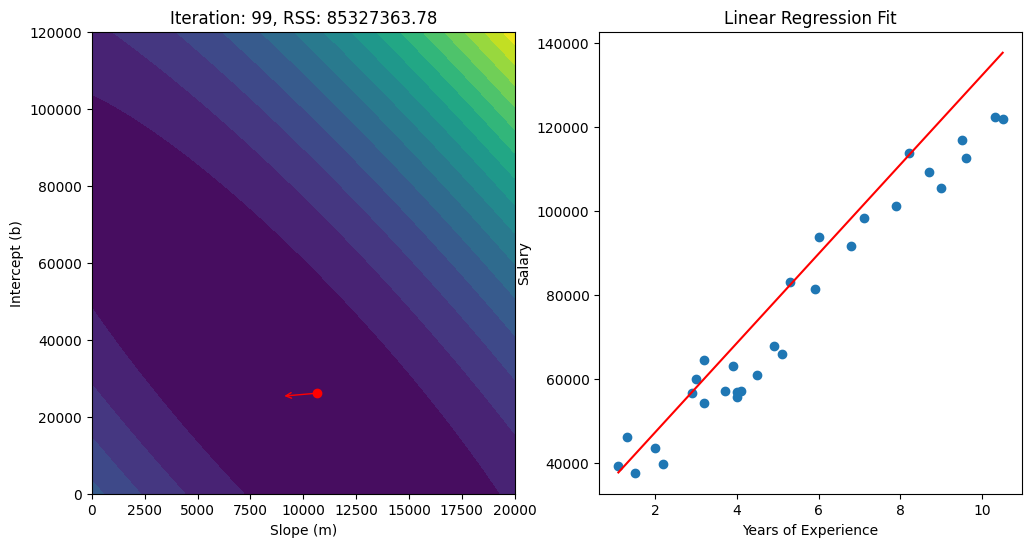

In [ ]:
def mse(m, b, x, y):
    predicted = m * x + b
    errors = y - predicted
    return np.mean(errors**2)

def stochastic_gradient_descent(x, y, learning_rate, num_iterations):
    m = 0
    b = 0
    cost_history = []
    for i in range(num_iterations):
        shuffled_indices = np.random.permutation(len(x))
        x_shuffled = x[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for xi, yi in zip(x_shuffled, y_shuffled):
            predicted = m * xi + b
            error = yi - predicted
            m_gradient = -2 * xi * error
            b_gradient = -2 * error
            m -= learning_rate * m_gradient
            b -= learning_rate * b_gradient
        cost = mse(m, b, x, y)
        cost_history.append(cost)
    return m, b, cost_history
x = salary_data['YearsExperience'].values
y = salary_data['Salary'].values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
m_range = np.linspace(0, 20000, 100)
b_range = np.linspace(0, 120000, 100)
M, B = np.meshgrid(m_range, b_range)
Z = np.array([[mse(m, b, x, y) for m in m_range] for b in b_range])
scatter = ax2.scatter(x, y)
line, = ax2.plot([], [], color='red')
def update(frame):
    ax1.clear()
    ax2.clear()
    m, b, _ = stochastic_gradient_descent(x, y, 0.01, frame)
    ax1.set_title(f'Iteration: {frame}, RSS: {mse(m, b, x, y):.2f}')
    ax1.set_xlabel('Slope (m)')
    ax1.set_ylabel('Intercept (b)')
    ax1.contourf(M, B, Z, levels=20, cmap='viridis')
    ax1.plot(m, b, 'ro')
    ax2.scatter(x, y)
    ax2.plot(x, m * x + b, color='red')
    ax2.set_title('Linear Regression Fit')
    ax2.set_xlabel('Years of Experience')
    ax2.set_ylabel('Salary')
    if frame > 0:
        m_prev, b_prev, _ = stochastic_gradient_descent(x, y, 0.01, frame - 1)
        arrow = ax1.annotate(
            "", xy=(m_prev, b_prev), xytext=(m, b), arrowprops=dict(arrowstyle="->", color="red")
        )
    return line,
ani = FuncAnimation(fig, update, frames=range(100), blit=True)
ani.save('linear_regression_animation_sgd.gif', writer='pillow')
plt.show()

## Question 3

In [ ]:
def mae(m, b, x, y):
    predicted = m * x + b
    errors = y - predicted
    return abs(errors)

In [ ]:
def gradient_descent(x, y, learning_rate, num_iterations):
    m = 0
    b = 0
    cost_history = []
    for i in range(num_iterations):
        predicted = m * x + b
        errors = y - predicted
        cost = mse(m, b, x, y)
        cost_history.append(cost)
        m_gradient = (-2/len(x)) * np.sum(x * errors)
        b_gradient = (-2/len(x)) * np.sum(errors)
        m -= learning_rate * m_gradient
        b -= learning_rate * b_gradient
    return m, b, cost_history

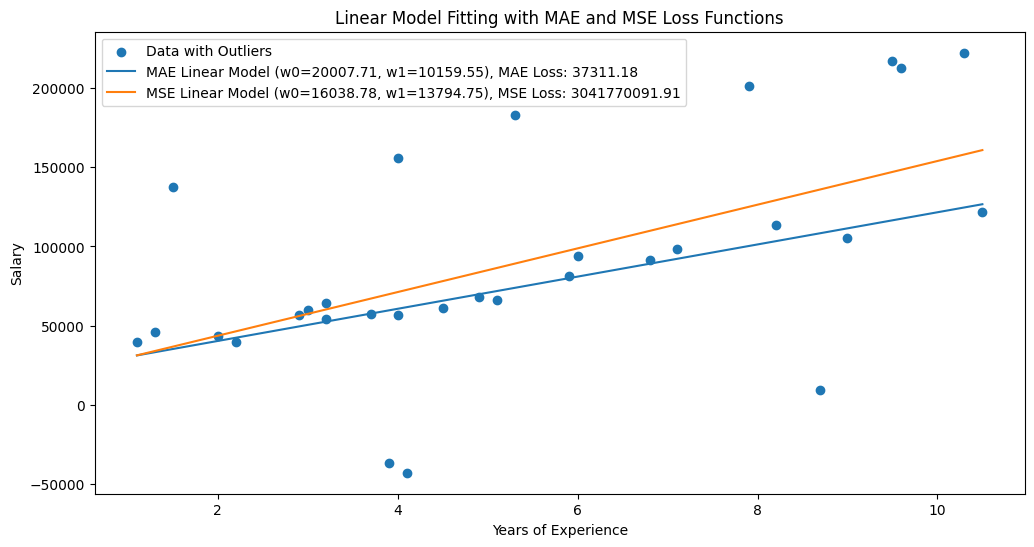

Mean Absolute Residuals for MAE Linear Model: 37311.18
Mean Absolute Residuals for MSE Linear Model: 38802.72
Mean Squared Residuals for MAE Linear Model: 3380175612.38
Mean Squared Residuals for MSE Linear Model: 3041770091.91


In [ ]:
x = salary_data['YearsExperience'].values
y = salary_data['Salary'].values
np.random.seed(0)
outliers_indices = np.random.choice(range(len(y)), size=10, replace=False)
y[outliers_indices] += np.random.choice([-100000, 100000], size=10)
def MAE(x, w):
    return w[0] + w[1] * x
def MSE(x, w):
    return w[0] + w[1] * x
def loss_MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
def loss_MSE(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)
w_initial_guess = [0, 0]
res_MAE = minimize(lambda w: loss_MAE(y, MAE(x, w)), w_initial_guess)
w_MAE = res_MAE.x
res_MSE = minimize(lambda w: loss_MSE(y, MSE(x, w)), w_initial_guess)
w_MSE = res_MSE.x
y_pred_MAE = MAE(x, w_MAE)
y_pred_MSE = MSE(x, w_MSE)
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Data with Outliers')
plt.plot(x, y_pred_MAE, label=f'MAE Linear Model (w0={w_MAE[0]:.2f}, w1={w_MAE[1]:.2f}), MAE Loss: {loss_MAE(y, y_pred_MAE):.2f}')
plt.plot(x, y_pred_MSE, label=f'MSE Linear Model (w0={w_MSE[0]:.2f}, w1={w_MSE[1]:.2f}), MSE Loss: {loss_MSE(y, y_pred_MSE):.2f}')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Model Fitting with MAE and MSE Loss Functions')
plt.legend()
plt.show()
residuals_MAE = np.abs(y - y_pred_MAE)
residuals_MSE = np.abs(y - y_pred_MSE)
print(f'Mean Absolute Residuals for MAE Linear Model: {np.mean(residuals_MAE):.2f}')
print(f'Mean Absolute Residuals for MSE Linear Model: {np.mean(residuals_MSE):.2f}')
print(f'Mean Squared Residuals for MAE Linear Model: {np.mean(residuals_MAE**2):.2f}')
print(f'Mean Squared Residuals for MSE Linear Model: {np.mean(residuals_MSE**2):.2f}')

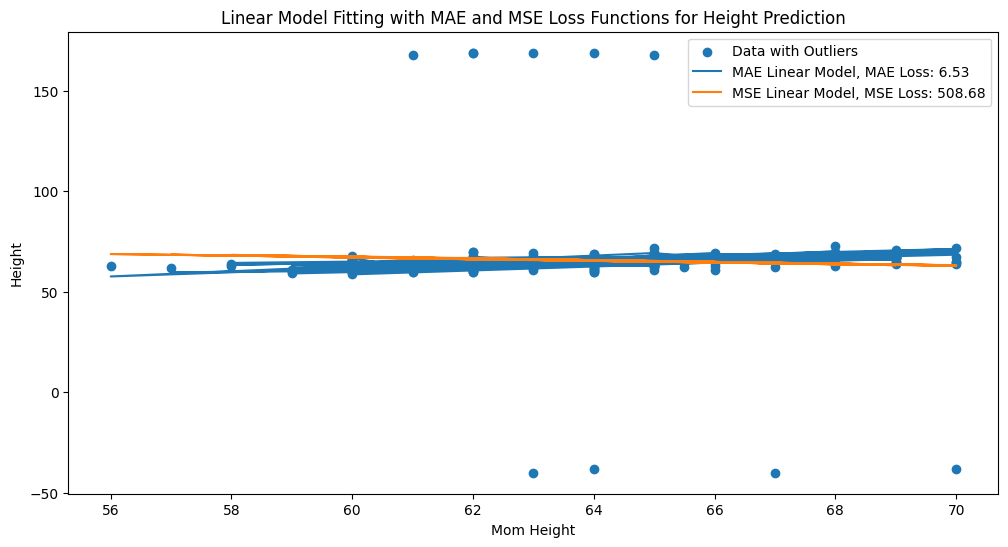

Mean Absolute Residuals for MAE Linear Model: 6.53
Mean Absolute Residuals for MSE Linear Model: 7.63
Mean Squared Residuals for MAE Linear Model: 521.02
Mean Squared Residuals for MSE Linear Model: 508.68


In [ ]:
x_mom = stats_female['momheight'].values
x_dad = stats_female['dadheight'].values
y_height = stats_female['Height'].values
np.random.seed(0)
outliers_indices_height = np.random.choice(range(len(y_height)), size=10, replace=False)
y_height[outliers_indices_height] += np.random.choice([-5, 5], size=10)
def linear_model(x1, x2, w):
    return w[0] + w[1] * x1 + w[2] * x2
def loss_MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))
def loss_MSE(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)
w_initial_guess_height = [0, 0, 0]
res_MAE_height = minimize(lambda w: loss_MAE(y_height, linear_model(x_mom, x_dad, w)), w_initial_guess_height)
w_MAE_height = res_MAE_height.x
res_MSE_height = minimize(lambda w: loss_MSE(y_height, linear_model(x_mom, x_dad, w)), w_initial_guess_height)
w_MSE_height = res_MSE_height.x
y_pred_MAE_height = linear_model(x_mom, x_dad, w_MAE_height)
y_pred_MSE_height = linear_model(x_mom, x_dad, w_MSE_height)
plt.figure(figsize=(12, 6))
plt.scatter(x_mom, y_height, label='Data with Outliers')
plt.plot(x_mom, y_pred_MAE_height, label=f'MAE Linear Model, MAE Loss: {loss_MAE(y_height, y_pred_MAE_height):.2f}')
plt.plot(x_mom, y_pred_MSE_height, label=f'MSE Linear Model, MSE Loss: {loss_MSE(y_height, y_pred_MSE_height):.2f}')
plt.xlabel('Mom Height')
plt.ylabel('Height')
plt.title('Linear Model Fitting with MAE and MSE Loss Functions for Height Prediction')
plt.legend()
plt.show()
residuals_MAE_height = np.abs(y_height - y_pred_MAE_height)
residuals_MSE_height = np.abs(y_height - y_pred_MSE_height)
print(f'Mean Absolute Residuals for MAE Linear Model: {np.mean(residuals_MAE_height):.2f}')
print(f'Mean Absolute Residuals for MSE Linear Model: {np.mean(residuals_MSE_height):.2f}')
print(f'Mean Squared Residuals for MAE Linear Model: {np.mean(residuals_MAE_height**2):.2f}')
print(f'Mean Squared Residuals for MSE Linear Model: {np.mean(residuals_MSE_height**2):.2f}')

Hence we can conclude that mean absolute error is robust to outliers.